<a href="https://colab.research.google.com/github/lsuhpchelp/loniscworkshop2025/blob/main/day2/IntermediatePython_Exercises_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Day 2: Intermediate Python (Exercises)**
### 2025 LONI Scientific Computing Bootcamp

Dr. Jianxiong "Jason" Li

jasonli3@lsu.edu

Jun 3, 2025

In [6]:
# Run this first so that you do not have to load NumPy every time
import numpy as np

<br><br>

---
## **1. Warm Up**
---

### **1) Creation:**

Create a 1-D array:

* Type is `float32`
* From `0` to `30`, step length is `3`
* Do not use `np.array()` method!
* Desired output:
> ```
[0. 3. 6. 9. 12. 15. 18. 21. 24. 27.]
float32
```

In [ ]:
myAry = np.arange(0, 30, 3, dtype="float32")
print(myAry)
print(myAry.dtype)

### **2) Reshape**

* Reshape the above 1-D array to a 2-D array with 2 rows
* Desired output:
  > ```
[[ 0.  3.  6.  9. 12.]
 [15. 18. 21. 24. 27.]]
 ```

In [ ]:
myAry2 = myAry.reshape(2,-1)
print(myAry2)

### **3) Slicing**

* From the original 1D array, get every second element in the reverse order from index 5
* Desired output:

> ```
[15., 9., 3.]
 ```

In [ ]:
myAry3 = myAry[5::-2]
print(myAry3)

* From above array, pick every other element on axis 1, and keep axis 0
* Desired out
> ```
  [[ 0.  6. 12.]
  [15. 21. 27.]]
  ```

In [ ]:
myAry4 = # FIX ME
print(myAry4)

### **4) Basic Operations**

* For above array, calculate the square of each element, then change the data type to `int`
* Desired output:
> ```
[[  0  36 144]
 [225 441 729]]
 ```

In [ ]:
myAry4 = (myAry3**2).astype("int")
print(myAry4)

### **5) Aggregation Functions**

* For above array, sum over rows and columns of above array, respectively
* Desired output:
> ```
[225 477 873]
[ 180 1395]
```

In [ ]:
row_sum = myAry4.sum(axis=0)
print(row_sum)

col_sum = myAry4.sum(axis=1)
print(col_sum)

### **6) Broadcast**

* Calculate Gaussian from Cartesian coordinates
$$
G(x, y) = \exp\left( -\frac{x^2 + y^2}{2\sigma^2} \right)
$$ 
Where **$$ x, y \in [-3, 3], \sigma = 1. $$**
* Gaussian is the exponent of `x^2 + y^2` (Hint: Use `np.exp()`)
* Both `x` and `y` range from `-3` to `3`, a total of linearlly spaced `7` elements
* You result should be a `(7 x 7)` array, each element is the radius of coordinates `(x, y)`.
* Do **NOT** use loop even if you are attempted to!!
* Desired output:
>```
x =  [-3. -2. -1.  0.  1.  2.  3.]
y =
 [[-3.]
 [-2.]
 [-1.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 3.]]
G =
[[0.00012 0.0015  0.00674 0.01111 0.00674 0.0015  0.00012]
 [0.0015  0.01832 0.08208 0.13534 0.08208 0.01832 0.0015 ]
 [0.00674 0.08208 0.36788 0.60653 0.36788 0.08208 0.00674]
 [0.01111 0.13534 0.60653 1.      0.60653 0.13534 0.01111]
 [0.00674 0.08208 0.36788 0.60653 0.36788 0.08208 0.00674]
 [0.0015  0.01832 0.08208 0.13534 0.08208 0.01832 0.0015 ]
 [0.00012 0.0015  0.00674 0.01111 0.00674 0.0015  0.00012]]
 ```

In [3]:
x = np.linspace(-3, 3, 7)
y = np.linspace(-3, 3, 7).reshape(-1,1)
sigma=1
print("x = ", x)
print("y = \n", y)

G = np.exp(- (x**2 + y**2) / (2*sigma**2) )
np.set_printoptions(suppress=True, precision=5) #Avoid printing in scientific format
print("G = \n", G)

x =  [-3. -2. -1.  0.  1.  2.  3.]
y = 
 [[-3.]
 [-2.]
 [-1.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 3.]]
G = 
 [[0.00012 0.0015  0.00674 0.01111 0.00674 0.0015  0.00012]
 [0.0015  0.01832 0.08208 0.13534 0.08208 0.01832 0.0015 ]
 [0.00674 0.08208 0.36788 0.60653 0.36788 0.08208 0.00674]
 [0.01111 0.13534 0.60653 1.      0.60653 0.13534 0.01111]
 [0.00674 0.08208 0.36788 0.60653 0.36788 0.08208 0.00674]
 [0.0015  0.01832 0.08208 0.13534 0.08208 0.01832 0.0015 ]
 [0.00012 0.0015  0.00674 0.01111 0.00674 0.0015  0.00012]]


<br><br>

---
## **2. Write Your Own ReLU Function**
---

> * The purpose of this exercise is to practice the use of advanced indexing.

Rectified Linear Unit (ReLU) is a commonly used activation function in machine learning. The definition is simple:

![P_2_ReLU.png](https://github.com/lsuhpchelp/loniscworkshop2025/raw/main/day2/images/P_2_ReLU.png)

Here, you are asked to write your own ReLU funcion acting on a data array:

* **Input**:
  * An array of numbers (int or float).
* **Function**:
  * Changes all negative numbers in the input array to 0.
  * Modifies the input array **in-place** (not returning a copy of the result).

**!!CAUTION!!**

* I did not say the input is 1-D array. Could be any arbitrary shape.
* Use ufunc, advanced indexing and/or any other method for efficiency.
* Do **NOT** use loop even if you are attempted to!! Don't do anything like this:
>```
for i in range(x.size):
    if x[i]<0:
      ...
```
* Hint: Feel free to use any method to achieve it. Below I provided hints to two differnt methods using what we talked about today:
  * Method 1: Keep in mind boolean array indexing is a reference.
  * Method 2: When used in arithmatic calculation, boolean value `True` is treated as `1`, and `False` as `0`.

In [ ]:
# Define your own ReLU function

# Method 1
def relu_1(x):
  x[x<0] = 0

# Method 2
def relu_2(x):
  x *= x>0

myAry = np.random.random([5, 5]) - 0.5
print("Input = \n", myAry)

relu_1(myAry)
#relu_2（myAry)
print("\nOutput = \n", myAry)

<br><br>

---
## **3. Statistics with NumPy**
---

> * The purpose of this exercise is to practice the use of slicing, aggregation functions and advanced indexing.

### **Example 1** ###

In this example, you are monitoring the height (in cm) of 3 plants over 7 days in your lab. You need to calculate the growth of these 3 plants over 7 days. Use NumPy to analyze and simulate their growth.

**These are your tasks:**

* Create the numpy array
* Simulate a fertilizer boost, e.g, each plant is height is growing by 5% per each day (multiply with 1.05 every height)
* Compute statistics like average height, max height, and total growth

In [15]:
# 1. Create a NumPy array with heights (in cm) of 3 plants over 7 days
# Use np.array() to define this 2D array (shape: 3x7)
# Hint: Use np.array with 3 sub-lists (one per plant)

# Plant A: 10, 12, 14, 15, 15.5, 16, 17
# Plant B: 8, 8.5, 9, 9.8, 10.2, 11, 12
# Plant C: 9, 9.5, 10.5, 11, 11.8, 12.5, 13

heights = np.array([
    [10, 12, 14, 15, 15.5, 16, 17],
    [8, 8.5, 9, 9.8, 10.2, 11, 12],
    [9, 9.5, 10.5, 11, 11.8, 12.5, 13]
], dtype=float)

print("heights\n= ", heights)

heights
=  [[10.  12.  14.  15.  15.5 16.  17. ]
 [ 8.   8.5  9.   9.8 10.2 11.  12. ]
 [ 9.   9.5 10.5 11.  11.8 12.5 13. ]]


In [21]:
# 2. Simulate a fertilizer boost: all plants grow 5% more each day
# Use a universal function (ufunc) to scale the heights by 1.05
# Hint: Use element-wise multiplication

boosted = heights * 1.05

print("boosted \n= ", boosted)

boosted 
=  [[10.5   12.6   14.7   15.75  16.275 16.8   17.85 ]
 [ 8.4    8.925  9.45  10.29  10.71  11.55  12.6  ]
 [ 9.45   9.975 11.025 11.55  12.39  13.125 13.65 ]]


In [22]:
# 3. Calculate the average and maximum height per plant across 7 days
# Use np.mean with appropriate axis
# Hint: axis=1 gives row-wise mean (per plant)

avg_per_plant = np.mean(boosted, axis=1)
max_per_plant = np.max(boosted, axis=1)

print("\n Average per Plant\n = ", avg_per_plant)
print("\n Maximum per Plant\n = ", max_per_plant)


 Average per Plant
 =  [14.925 10.275 11.595]

 Maximum per Plant
 =  [17.85 12.6  13.65]


In [23]:
# 4. Calculate total growth over 7 days (final height - initial height)
# Hint: Access first and last column of each row

growth = boosted[:, -1] - boosted[:, 0]

# 5. Print results
print("Average height per plant:", avg_per_plant)
print("Maximum height per plant:", max_per_plant)
print("Total growth in 7 days:", growth)

Average height per plant: [14.925 10.275 11.595]
Maximum height per plant: [17.85 12.6  13.65]
Total growth in 7 days: [7.35 4.2  4.2 ]


### **Example 2** ###

Here, you are asked to perform some basic statistical calculation on the data array previously loaded from "data.txt". The loaded data should have 3 columns:
> ```
Index, Brain Weight, Body Weight
```

**!!CAUTION!!**

* Use aggregation functions, advanced indexing or any other method for efficiency.
* Do **NOT** use loop even if you are attempted to!!

In [4]:
# Load data

txtfile = 'https://github.com/lsuhpchelp/loniscworkshop2025/raw/main/day2/data.txt'
data = np.loadtxt(txtfile,
                  skiprows=16,
                  usecols={0,1,2},
                  comments="#")
print("Loaded data:\n", data)

Loaded data:
 [[  1.      3.385  44.5  ]
 [  2.      0.48   33.38 ]
 [  3.      1.35    8.1  ]
 [  4.    465.    423.   ]
 [  5.     36.33  119.5  ]
 [  6.     27.66  115.   ]
 [  7.     14.83   98.2  ]
 [  8.      1.04    5.5  ]
 [  9.      4.19   58.   ]]


### **1) Calculate the average, max, and min brain weight and body weight, respectively**

Complete the below calculations.

In [ ]:
# Calculate average, max, and min brain weight
ave_brain_weight = data[:, 1].mean()
max_brain_weight = data[:, 1].max()
min_brain_weight = data[:, 1].min()
print("Average brain weight is:\t", ave_brain_weight)
print("Max brain weight is:\t", max_brain_weight)
print("Min brain weight is:\t", min_brain_weight)

# Calculate average, max, and min body weight
ave_body_weight = data[:, 2].mean()
max_body_weight = data[:, 2].max()
min_body_weight = data[:, 2].min()
print("Average brain weight is:\t", ave_body_weight)
print("Max brain weight is:\t", max_body_weight)
print("Min brain weight is:\t", min_body_weight)

### **2) Filter out bad data points**

Now, notice there is a bad point: Someone's brain is heavier than the body! That is physically impossible. Please remove any rows where the brain is heavier than the body, and redo above calculation.

Hint: Use advanced indexing.

In [ ]:
# Filter out bad data points
data_filtered = data[ data[:,1]<data[:,2] ]
print("Filtered data:\n", data_filtered)

# Calculate average, max, and min brain weight
ave_brain_weight = data_filtered[:, 1].mean()
max_brain_weight = data_filtered[:, 1].max()
min_brain_weight = data_filtered[:, 1].min()
print("Average brain weight is:\t", ave_brain_weight)
print("Max brain weight is:\t", max_brain_weight)
print("Min brain weight is:\t", min_brain_weight)

# Calculate average, max, and min body weight
ave_body_weight = data_filtered[:, 2].mean()
max_body_weight = data_filtered[:, 2].max()
min_body_weight = data_filtered[:, 2].min()
print("Average brain weight is:\t", ave_body_weight)
print("Max brain weight is:\t", max_body_weight)
print("Min brain weight is:\t", min_body_weight)

<br><br>

---
## **4. Wave Function Propagation of 1-D Harmonic Oscillator**
---

> * The purpose of this exercise it to practice various NumPy array creationg methods, ufuncs, and aggregation functions in a close-to-practical problem.
> * Don't worry if you do not work in physics! You can still finish the exercise even if you do not know the physics.

1-D harmonic oscillator is one of the most fundamental dynamic systems in both classical and quantime-mechanical physics. It describes the dynamics of a particle inside a square potential `V(x) ∝ x^2`. In classical picture, it is just a mass attached to a spring oscillating back and forth. In quantum-mechanical picture, however, is a little more complicated.

In quantum mechanics, a particle is not located in a fixed place, instead it has a **probability distribution** of where it may be found, which is defined by a **wave function**. In a quantum-mechanical picture, instead of the particle itself oscillating back and forth, it looks more like its probability distribution (a "wave packet", if you will) oscillating back and forth, but in the same way the mass does in the classical picture.

![P_4_scenario.png](https://github.com/lsuhpchelp/loniscworkshop2025/raw/main/day2/images/P_4_scenario.png)


Here, you are asked to write a simple code to study how the wave function of a 1-D harmonic oscillator propagates using quantum mechanical methods.

**!!CAUTION!!**

* Use aggregation functions, ufuncs or any other method for efficiency.
* Do **NOT** use loop even if you are attempted to!!

### **1) Create the initial wave function on a discrete grid**

First create a 1-D array of `x` coordinates from `[-L/2, L/2]` (`L=10`), evenly spaced in `N=101` grid points. You will also need to find out step length `dx`.

Then create the initial wave function on the above grid, which should look like:

![P_4_psi.png](https://github.com/lsuhpchelp/loniscworkshop2025/raw/main/day2/images/P_4_psi.png)

The `√C` is the normalization factor.

Matplotlib is building the font cache; this may take a moment.


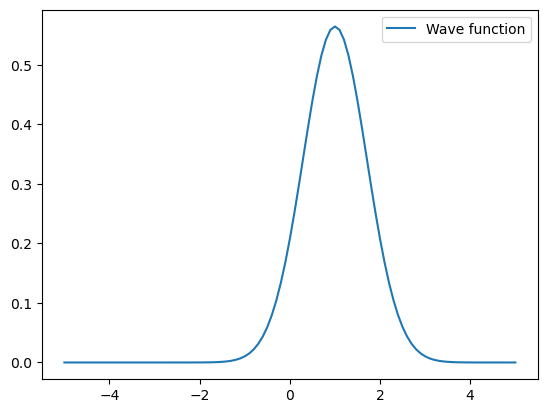

In [5]:
# Define parameters
N = 101       # Number of grid points
L = 10.0      # Length of the box

# Define the array x coordinates and obtrain step length dx
# Hint: You may np.linspace() to create the array and return the step length
x, dx = np.linspace(-L/2, L/2, N, retstep=True)

# Calculate the initial wave function
# For simplicity, first calculate without dividing by normalization factor "√N", then do the normalization
# Hint: You may need np.exp(), np.sqrt(), sum()
psi = np.exp(-(x-1)**2/2)
psi /= np.sqrt((np.abs(psi)**2).sum() * dx)

# Plot probability distribution abs(psi)**2
import matplotlib.pyplot as plt
plt.plot(x, np.abs(psi)**2, label="Wave function")
plt.legend()
plt.show()

### **2) Create the Hamiltonian matrix**

The Hamiltonian matrix is core of the dynamics in quantume mechanics. The Hamiltonian matrix is an `(N, N)` matrix (NumPy array), which can be defined this way:

![P_4_H.png](https://github.com/lsuhpchelp/loniscworkshop2025/raw/main/day2/images/P_4_H.png)

Basically, matrix `T` (kinetic energy) is a tridiagonal matrix, with all diagonal elements being `-2` and off-diagonal elements being `1`, then times a constant `-1/dx^2`. Matrix `V` (potential energy) is a diagonal matrix, with each element is the potential energy `V(x)=x^2/2` at the corresponding coordinate. All other unwritten elements are `0`.

In [ ]:
# Create matrix T
# Hint: You may need np.diag(), np.identity(), or np.eye(). Don't forget argument "k" sets off diagonal elements.
T = (-2*np.identity(N) + np.eye(N, k=1) + np.eye(N, k=-1)) / (-2*dx**2)

# Create matrix V
# Hint: You may need np.diag()
V = np.diag(x**2/2)

# Create Hamiltonian matrix H
H = T + V

# Print Hamiltonian matrix
print(H)

### **3) Build the propagator**

Now we are getting to the good stuff! By doing this, you can proudly tell your friends that you did some actual physics! Based on the Hamiltonian matrix, we will now build the propagator, which is a matrix you actually multiple to the left of the wave function. The propagator is defined like this:

![P_4_CN.png](https://github.com/lsuhpchelp/loniscworkshop2025/raw/main/day2/images/P_4_CN.png)

Where `I` is the `(N, N)` identity matrix, `i` is the imaginary unit, and `dt` is the time step length. Here we will let time goes from `0` to `4*pi`, and a total of `Nt=20,000` steps, so that step length is short enough. Notice that there is a matrix inverse and a matrix multiplications!

> This method is called Crank-Nicholson method, the most commonly used numerical method to propagate wave function. The reason we form the propagator this way is to preserve normalization of the wave function.

In [ ]:
# Define time coordinates and return time step length dt
# Hint: You may np.linspace() to create the array and return the time step
tmin = 0
tmax = 4*np.pi
Nt = 20000
t, dt = np.linspace(tmin, tmax, Nt, retstep=True)
print("Time step length is:", dt)

# Create the propagator
# Hint: You may need:
#       np.linalg.inv(A)  : Matrix inverse
#       np.dot(A,B)       : Matrix multiplication
#       1j                : Imaginary unit
U = np.dot( np.linalg.inv(np.identity(N) + 1j*dt/2*H), np.identity(N) - 1j*dt/2*H)

# Print the propagator
print("Propagator is:\n", U)

# Look, your propagator should be close to an identity matrix

### **4) Let's see the results!**

Now let's see the results! This part is not very related to NumPy, so I will not ask you to write or understand. But if you have done correctly in previous steps, just run this part and you should see a nice animation of wave packet oscillating back and forth like a classical particle. If it is messed up, check previous steps again.

In [ ]:
#@markdown (Run me. I promise there is no harm.)

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Change psi to complex number
psi = psi.astype("complex")

# Create a figure and axes
fig, ax = plt.subplots()

# Set the x and y axis of the plot
ax.set_xlim(-L/2, L/2)
ax.set_ylim(0, 1)

# Initialize an empty line object
ax.plot(x, x**2/20, "--")
line, = ax.plot([], [])

# Define the animation update function
nframe = 100
def update(frame):

    # Generate y values based on the frame number
    global psi
    global nframe
    for index in range(int(Nt/nframe)):
      psi = np.dot(U, psi)

    # Update the line data
    line.set_data(x, np.abs(psi)**2)

    return line,

# Create the animation
animation = FuncAnimation(fig, update, frames=nframe, interval=50, blit=True)

#animation.save("P_4_result.gif")
from IPython.display import HTML
HTML(animation.to_jshtml())

If you are doing it correctly, you should get something like this:
![P_4_result.gif](https://github.com/lsuhpchelp/loniscworkshop2025/raw/main/day2/images/P_4_result.gif)

Now, congratulations! You just did some physics research!

FYI, what you just did is actually solving the most fundamental equation in quantum mechanics: **Time-Dependent Schrodinger's Equation** (**TDSE**). TDSE governs the quantum-mechanical dynamics of the microscopic particles. In actual research, physicists usually propagate TDSE like this to see how wave function evolve in time to extract useful information. And TDSE results are sometimes regarded as the **exact** results, pretty much equivalent to what you would get in experiments.

But actual research problems could be much more costly. They may need larger grid, 3-D instead of 1-D, spherical coordinates, multiple particles, different physics models, etc..